### Business Case: Retail Customer Purchase Analysis

### Business Problem :-

A retail management team is interested in examining customer purchase behavior, specifically the purchase amount, in relation to gender and other factors. Their objective is to gain insights into whether there are variations in spending between female and male customers on Black Friday. This analysis is critical for making strategic decisions.

### About the Retail Company :-

The retail company under consideration is a prominent American multinational corporation. It manages a network of supercenters, discount departmental stores, and grocery outlets within the United States. This retail giant serves a vast customer base of over 100 million individuals globally.

### About Dataset 

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:


User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city


Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

### import all important file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
df=pd.read_csv('walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


### Analyzing basic metrics about dataset

In [4]:
#shape(rows,column)
print("rows:",df.shape[0],"column:",df.shape[1])

rows: 550068 column: 10


In [5]:
df.size

5500680

In [6]:
#Data types of column
df.dtypes


User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [7]:
#columns_name
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [8]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [9]:
# conversion of categorical attributes to 'category'
column=["User_ID","Occupation","Marital_Status","Product_Category"]
df[column]=df[column].astype("object")

In [10]:
df.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [11]:
#statistical summary
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [12]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


In [13]:
df.describe(include="object")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [14]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [15]:
#finding unique values in columns
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [16]:
#check for duplicate values
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

In [17]:
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


there are no duplicate values in dataset

In [18]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### Dataset ovservation:
1. The dataset stands devoid of any null values, ensuring data completeness.
2. It maintains data integrity with the absence of duplicate records.
3. Within the dataset, a diverse range of 20 distinct product types is evident.
4. The data suggests a predominant male customer base for product transactions.
5. Purchases are distributed among three distinct city categories: A, B, and C.
6. The dataset predominantly includes users within the 26-34 age range.
7. A notable trend emerges with the 5th product category, indicating it as the preferred choice among users.

### Non-Graphical Analysis: Value counts and unique attributes

In [19]:
#defining a function for value_count and unique values
def Unique(x):
  print("Unique_values:",df[x].unique())
  print("unique_values count:",df[x].nunique())
  print("value_count:",df[x].value_counts())

In [20]:
#User_ID
Unique("User_ID")

Unique_values: [1000001 1000002 1000003 ... 1004113 1005391 1001529]
unique_values count: 5891
value_count: 1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64


In [21]:
#Product_ID
Unique("Product_ID")

Unique_values: ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
unique_values count: 3631
value_count: P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64


In [22]:
#Gender
Unique("Gender")

Unique_values: ['F' 'M']
unique_values count: 2
value_count: M    414259
F    135809
Name: Gender, dtype: int64


In [23]:
#Age
Unique("Age")

Unique_values: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
unique_values count: 7
value_count: 26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


In [24]:
#Occupation
Unique("Occupation")

Unique_values: [10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]
unique_values count: 21
value_count: 4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


In [25]:
#City_Category
Unique("City_Category")

Unique_values: ['A' 'C' 'B']
unique_values count: 3
value_count: B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


In [26]:
#Stay_In_Current_City_Years
Unique("Stay_In_Current_City_Years")

Unique_values: ['2' '4+' '3' '1' '0']
unique_values count: 5
value_count: 1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


In [27]:
#Marital_Status
Unique("Marital_Status")

Unique_values: [0 1]
unique_values count: 2
value_count: 0    324731
1    225337
Name: Marital_Status, dtype: int64


In [28]:
#Product_Category
Unique("Product_Category")

Unique_values: [3 1 12 8 5 4 2 6 14 11 13 15 7 16 18 10 17 9 20 19]
unique_values count: 20
value_count: 5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64


In [29]:
#Purchase
Unique("Purchase")

Unique_values: [ 8370 15200  1422 ...   135   123   613]
unique_values count: 18105
value_count: 7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64


### Data ovservation by Non-Graphical Analysis: Value counts and unique attributes

1. **Gender Distribution**:
   - Male users make up approximately 75% (414,259 out of 550,068) of the dataset.
   - Female users account for around 25% (135,809 out of 550,068).

2. **Age Group Distribution**:
   - Users aged 26-35 represent the largest age group, constituting roughly 40% of the dataset.
   - The 0-17 age group and the 55+ age group each contribute to about 3% of the dataset.

3. **Occupation Distribution**:
   - Occupations 4 and 0 together make up approximately 23% of the dataset, with 4 being the most common.
   - Occupations 8 and 5 together represent about 13% of the dataset.
   
4. **City Category Distribution**:
   - City category B accounts for around 42% of the dataset.
   - City category C makes up approximately 31% of the dataset.
   - City category A represents about 27% of the dataset.

5. **Stay in Current City Distribution**:
   - Users who have stayed in their current city for 1 year constitute nearly 35% of the dataset.
   - Approximately 19% of users have stayed for 2 years, and around 17% have stayed for 3 years.

6. **Marital Status Distribution**:
   - Unmarried users make up roughly 59% of the dataset.
   - Married users account for approximately 41% of the dataset.

7. **Product Category Distribution**:
   - Product category 5 comprises about 26% of the dataset, making it the most popular.
   - Categories 1, 8, and 11 each represent around 8-9% of the dataset.

8. **Purchase Amount Distribution**:
   - Due to a wide range of purchase amounts, no single value represents a significant percentage of the dataset.
   - The most common purchase amount, 7,011, represents less than 0.5% of the dataset.


### Visual Analysis :-

### Missing Value & Outlier Detection :-

In [30]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

insights :- There are no null values in dataset.

### Finding outliers using Boxplot

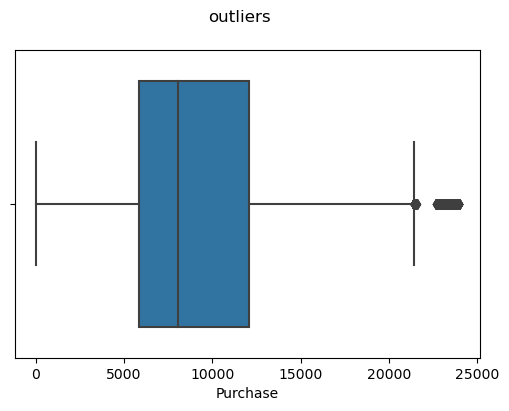

In [31]:
fig,ax=plt.subplots(figsize=(6,4))
fig.suptitle("outliers")

sns.boxplot(data=df,x="Purchase")
plt.show()

Insights : Based on the graphical representation, it is evident that Purchase has only a minor presence of outliers.

### Univariate Analysis :

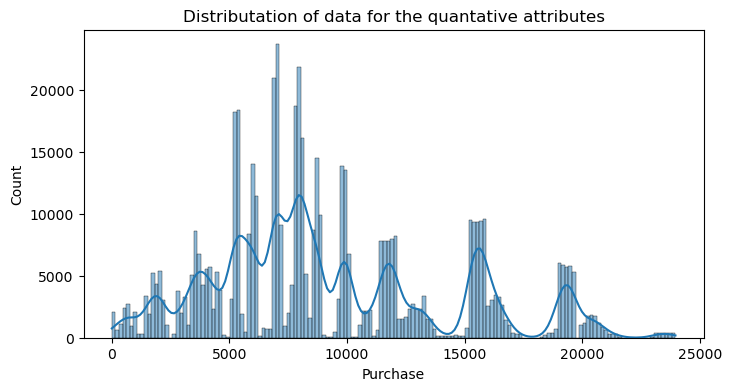

In [32]:
#Distributation of data for the quantative attributes
plt.figure(figsize=(8,4))
plt.title("Distributation of data for the quantative attributes")
sns.histplot(data=df,x="Purchase",kde=True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7472\3265886900.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,(3,4))


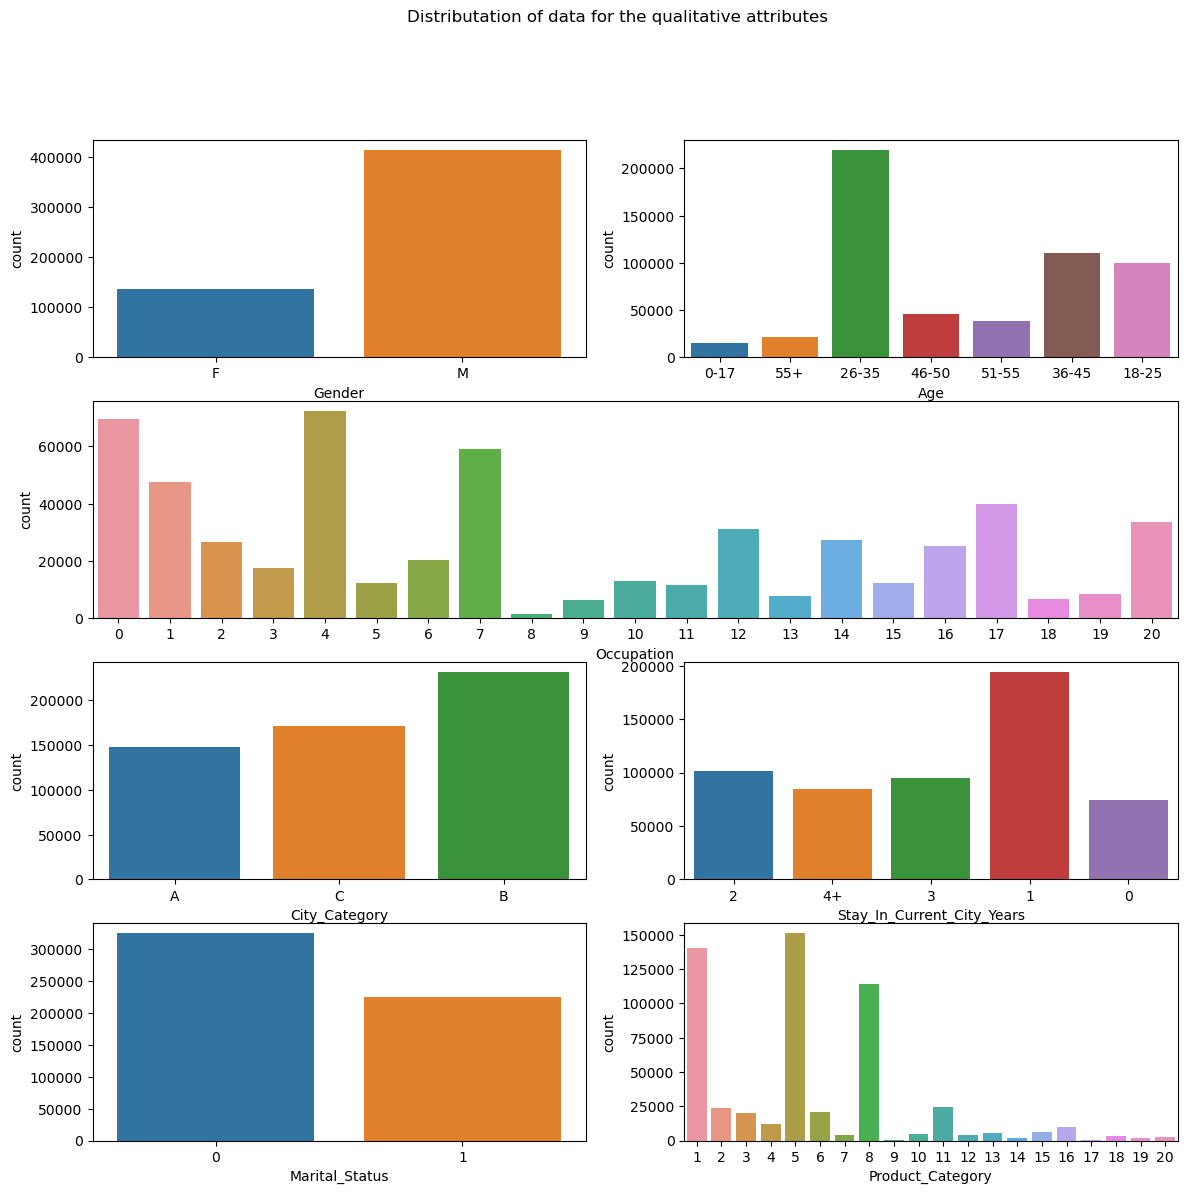

In [33]:
#Distributation of data for the qualitative attribute
fig,ax=plt.subplots(4,2,figsize=(14,13))
fig.suptitle("Distributation of data for the qualitative attributes")

plt.subplot(4,2,1)
sns.countplot(data=df,x="Gender",)

plt.subplot(4,2,2)
sns.countplot(data=df,x="Age")

plt.subplot(4,2,(3,4))
sns.countplot(data=df,x="Occupation")

plt.subplot(4,2,5)
sns.countplot(data=df,x="City_Category")

plt.subplot(4,2,6)
sns.countplot(data=df,x="Stay_In_Current_City_Years")

plt.subplot(4,2,7)
sns.countplot(data=df,x="Marital_Status")

plt.subplot(4,2,8)
sns.countplot(data=df,x="Product_Category")
plt.show()

Insights:


1. **Gender Distribution**:
   - The data suggests a significant majority of male users, indicating a potential gender-based trend in shopping behavior.

2. **Age Group Preferences**:
   - Users aged between 26 and 35 are the most prominent age group in the dataset, with a focus on users aged 18 to 45.

3. **Occupation Trends**:
   - Occupations labeled as 0, 4, and 7 appear frequently among the 20 occupation types.

4. **City Residence**:
   - City category labeled as 'B' has the highest number of users, while categories 'A' and 'C' show a more evenly distributed user population.

5. **Length of Residence**:
   - A majority of users have resided in their current city for more than one year, indicating stability in their place of residence.

6. **Marital Status**:
   - Unmarried users outnumber married users in the dataset.

7. **Product Category Preferences**:
   - Users predominantly purchase products from categories 5, 1, and 8.

C:\Users\HP\AppData\Local\Temp\ipykernel_7472\3949688622.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,(3,4))


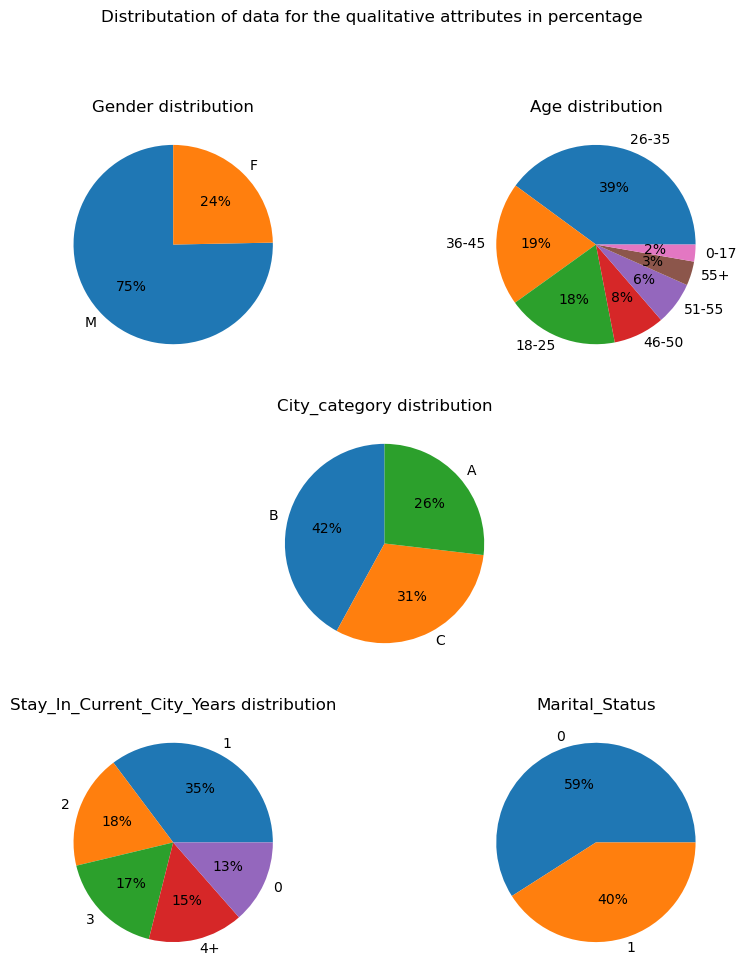

In [34]:
fig,ax=plt.subplots(3,2,figsize=(10,11))
fig.suptitle("Distributation of data for the qualitative attributes in percentage")

plt.subplot(3,2,1)
data_Gender=df['Gender'].value_counts(normalize=True)*100
plt.pie(data_Gender, labels=data_Gender.index, autopct='%d%%', startangle=90)
plt.title("Gender distribution")

plt.subplot(3,2,2)
data_Age=df['Age'].value_counts(normalize=True)*100
plt.pie(data_Age, labels=data_Age.index, autopct='%d%%',startangle=0)
plt.title("Age distribution")

plt.subplot(3,2,(3,4))
data_City_Category=df['City_Category'].value_counts(normalize=True)*100
plt.pie(data_City_Category, labels=data_City_Category.index, autopct='%d%%', startangle=90)
plt.title("City_category distribution")

plt.subplot(3,2,5)
data_Stay_In_Current_City_Years=df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
plt.pie(data_Stay_In_Current_City_Years, labels=data_Stay_In_Current_City_Years.index, autopct='%d%%', startangle=0)
plt.title("Stay_In_Current_City_Years distribution")

plt.subplot(3,2,6)
data_Marital_Status=df["Marital_Status"].value_counts(normalize=True)*100
plt.pie(data_Marital_Status, labels=data_Marital_Status.index, autopct='%d%%', startangle=0)
plt.title("Marital_Status")

plt.show()

### Bivariate Analysis 

In [35]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370


C:\Users\HP\AppData\Local\Temp\ipykernel_7472\2345472497.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,(3,4))


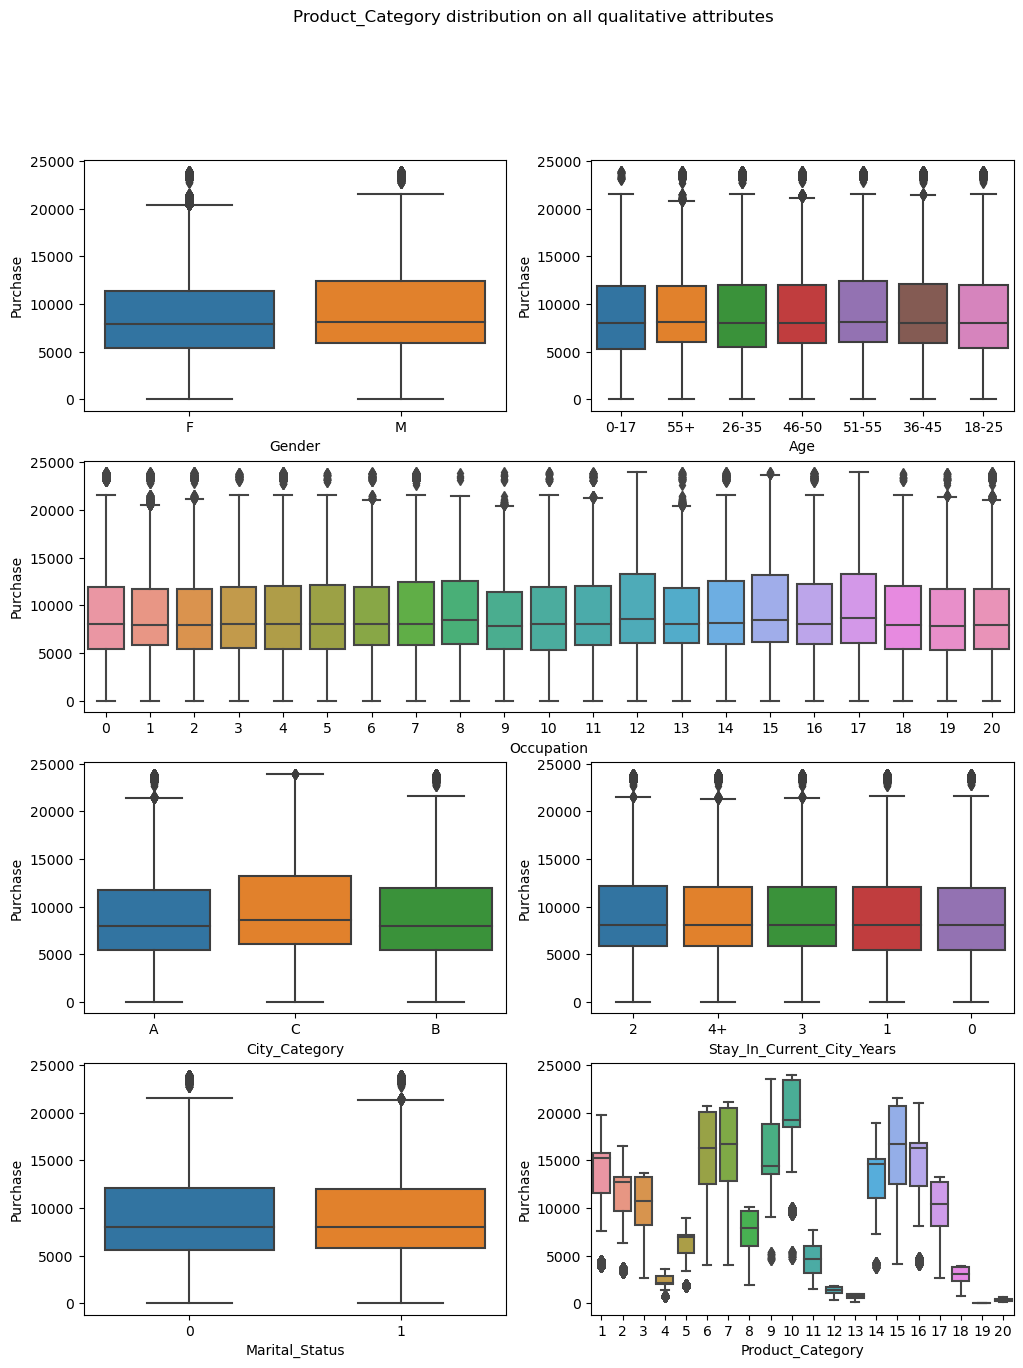

In [36]:
#Purchase distribution on all qualitative attributes(gender,Age,Occuption,City_Category,Stay_in_current_city_years,Marital_status,Product_Category)
fig,ax=plt.subplots(4,2,figsize=(12,15))
fig.suptitle("Product_Category distribution on all qualitative attributes")

plt.subplot(4,2,1)
sns.boxplot(data=df,x="Gender",y="Purchase")

plt.subplot(4,2,2)
sns.boxplot(data=df,x="Age",y="Purchase")

plt.subplot(4,2,(3,4))
sns.boxplot(data=df,x="Occupation",y="Purchase")

plt.subplot(4,2,5)
sns.boxplot(data=df,x="City_Category",y="Purchase")

plt.subplot(4,2,6)
sns.boxplot(data=df,x="Stay_In_Current_City_Years",y="Purchase")

plt.subplot(4,2,7)
sns.boxplot(data=df,x="Marital_Status",y="Purchase")

plt.subplot(4,2,8)
sns.boxplot(data=df,x="Product_Category",y="Purchase")

plt.show()

<Axes: xlabel='Marital_Status', ylabel='count'>

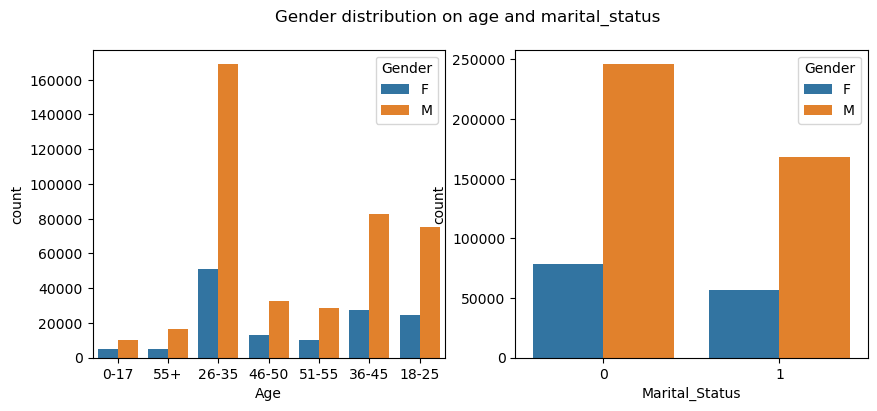

In [37]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
fig.suptitle("Gender distribution on age and marital_status")
plt.subplot(1,2,1)
sns.countplot(data=df,x="Age",hue="Gender")
plt.subplot(1,2,2)
sns.countplot(data=df,x="Marital_Status",hue="Gender")

In [39]:
data1=df.drop(["User_ID","Product_ID"],axis=1)

In [40]:
data1.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969


In [41]:
sample1=data1.sample(n=300)
sample1

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
397139,M,51-55,3,A,2,1,11,1485
515721,M,18-25,14,B,3,0,8,5837
414097,M,36-45,7,B,1,0,1,15372
450120,M,26-35,2,A,3,0,1,11758
413110,M,26-35,12,C,3,0,8,8046
...,...,...,...,...,...,...,...,...
34602,M,18-25,17,C,1,0,1,4412
126232,M,36-45,20,A,1,1,5,5171
198776,M,26-35,20,A,4+,0,5,5289
545171,F,26-35,0,C,1,1,8,7794


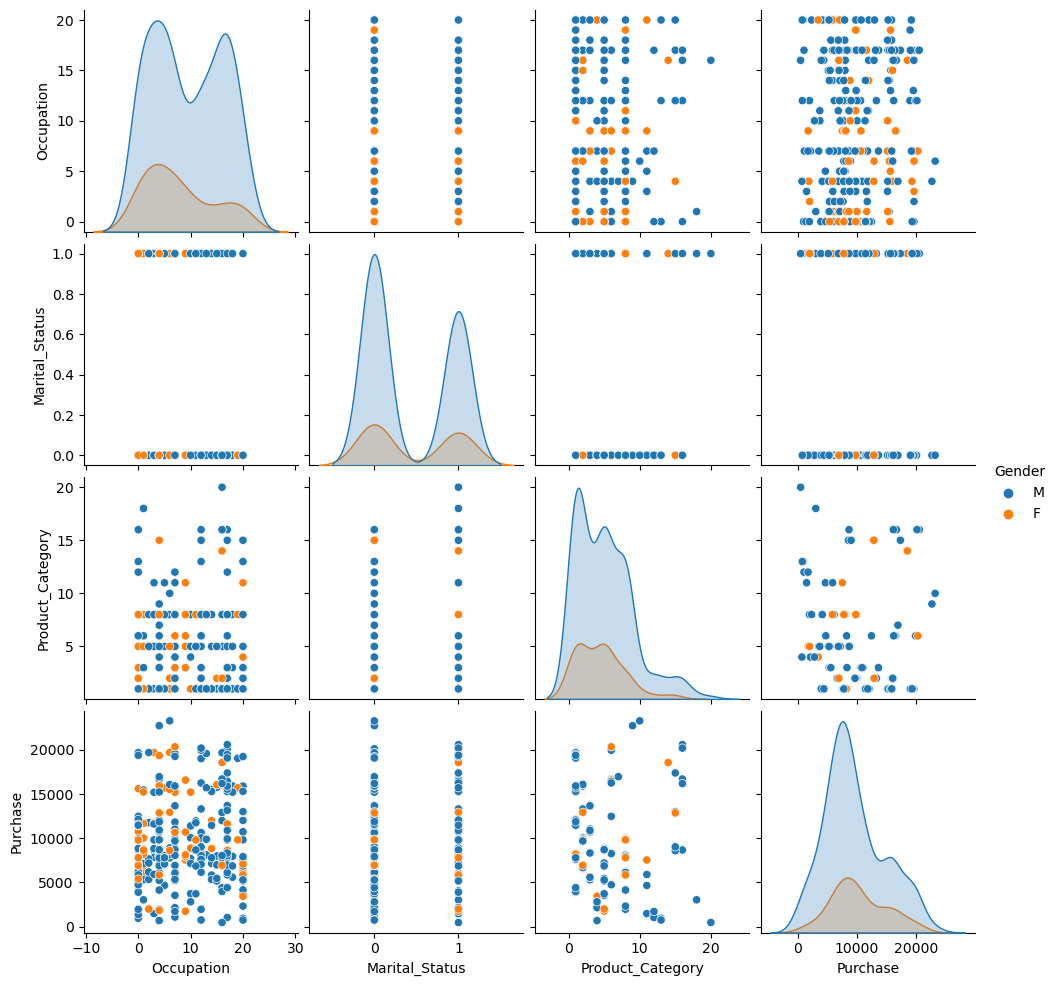

In [42]:
sns.pairplot(data=sample1,hue="Gender")
plt.show()

### Answering questions :


1.Are women spending more money per transaction than men? Why or Why not?

2.Confidence intervals and distribution of the mean of the expenses by female and male customers.

3.Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

4.Results when the same activity is performed for Married vs Unmarried.

5.Results when the same activity is performed for Age.

In [43]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


##### 1.Are women spending more money per transaction than men? Why or Why not?

In [44]:
#.Are women spending more money per transaction than men?
df.groupby("Gender")["Purchase"].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

Compare the average purchase amounts:

Women (F) spend an average of 8,734.57 per transaction.

Men (M) spend an average of 9,437.53 per transaction.

No, women are not spending more money per transaction than men.

**Analyzing the reasons why females are spending less money per transaction than men.**

In [45]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [46]:
df.groupby("Occupation")["Gender"].value_counts()

Occupation  Gender
0           M         51526
            F         18112
1           M         29442
            F         17984
2           M         17959
            F          8629
3           M          9731
            F          7919
4           M         54472
            F         17836
5           M          9957
            F          2220
6           M         12195
            F          8160
7           M         49105
            F         10028
8           M          1185
            F           361
9           F          5843
            M           448
10          M          8927
            F          4003
11          M         10086
            F          1500
12          M         27710
            F          3469
13          M          6230
            F          1498
14          M         20546
            F          6763
15          M          9775
            F          2390
16          M         21264
            F          4107
17          M         36114
 

In [47]:
df.groupby("Product_Category")["Gender"].value_counts()

Product_Category  Gender
1                 M         115547
                  F          24831
2                 M          18206
                  F           5658
3                 M          14207
                  F           6006
4                 M           8114
                  F           3639
5                 M         108972
                  F          41961
6                 M          15907
                  F           4559
7                 M           2778
                  F            943
8                 M          80367
                  F          33558
9                 M            340
                  F             70
10                M           3963
                  F           1162
11                M          19548
                  F           4739
12                M           2415
                  F           1532
13                M           4087
                  F           1462
14                M            900
                  F           

 the key reasons why females are spending less money per transaction than men in the provided dataset:-

1. **Gender Distribution**: There are significantly more male customers (414,259) than female customers (135,809) in the dataset. This difference in sample size can influence the average spending per transaction, as larger sample sizes tend to have more stable and higher averages.

2. **Occupation Distribution**: The dataset shows that the gender distribution varies across different occupations. Some occupations have a higher representation of females, while others have more males. These variations in occupation choices can affect the overall spending patterns.

3. **Product Category Preferences**: In most product categories, male customers make more purchases than female customers, resulting in higher counts for males. This suggests that males might be buying more expensive products or spending more in certain product categories.

4. **Income Disparities**: Income disparities between genders, which are not directly reflected in the dataset, can influence spending behavior. If males, on average, have higher incomes, they may be more willing to spend more per transaction.

5. **Sample Size Impact**: The difference in the number of males and females in the dataset can impact the overall average spending calculation. With a larger number of males, even small differences in spending can lead to variations in the average.

##### 2.Confidence intervals and distribution of the mean of the expenses by female and male customers.

In [49]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [50]:
def calc_CI(mean, std, N, confidence):
    # calculate std_error
    std_error = std / np.sqrt(N)
    print("Standard Error: ", std_error)

    # calculate the remaining fractions
    alpha=1-confidence


    # calculate z1 and z2
    z1 = norm.ppf(1-(alpha)/2)


    # calculate end points
    x1 = mean - (z1 * std_error)
    x2 = mean + (z1 * std_error)

    return "x1:",x1,"x2:" ,x2

In [51]:
#dataset of male_customer
df_male=df[df["Gender"]=="M"]
df_male.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [52]:
#Confidence_interval of all expences by male customer
male_mean=df_male["Purchase"].mean()
male_standred_deviation=np.std(df_male["Purchase"])
male_number=len(df_male)
confidence=0.95
calc_CI(male_mean, male_standred_deviation,male_number , confidence)

Standard Error:  7.911662926429179


('x1:', 9422.019466078644, 'x2:', 9453.032614865886)

In [53]:
#dataset of female customer
df_female=df[df["Gender"]=="F"]
df_female.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [54]:
#Confidence_interval of all expences by female customer
female_mean=df_female["Purchase"].mean()
female_standred_deviation=np.std(df_female["Purchase"])
female_number=len(df_female)
confidence=0.95
calc_CI(female_mean, female_standred_deviation,female_number , confidence)

Standard Error:  12.936015594920622


('x1:', 8709.211640485983, 'x2:', 8759.919889824969)

Text(0.5, 1.0, 'female-distribution')

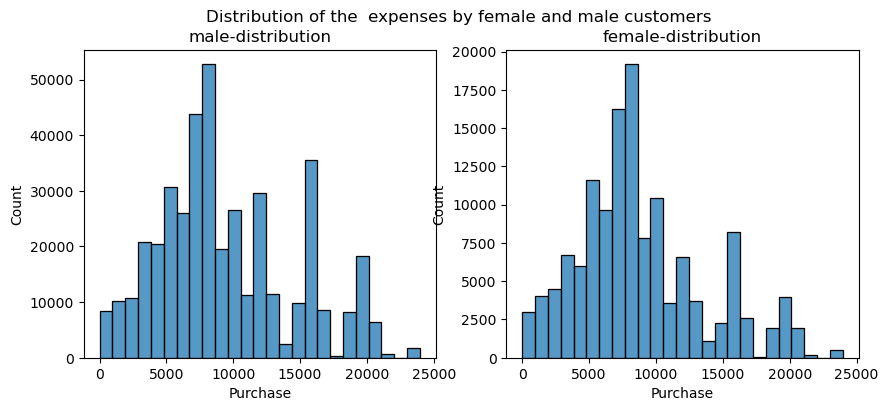

In [55]:
#Distribution of the  expenses by female and male customers
fig,ax=plt.subplots(1,2,figsize=(10,4))
fig.suptitle("Distribution of the  expenses by female and male customers")

plt.subplot(1,2,1)
sns.histplot(data=df_male,x="Purchase",bins=25)
plt.title("male-distribution")

plt.subplot(1,2,2)
sns.histplot(data=df_female,x="Purchase",bins=25)
plt.title("female-distribution")

In [56]:
#Confidence_interval  of the mean of the expenses by male customers.
#in this take 2000 sample  of length of 4000
male_sample_size=4000
number_of_repetation =2000
male_means=[]
for i in range(number_of_repetation):
  male_mean=df_male.sample(male_sample_size,replace=True)["Purchase"].mean()
  male_means.append(male_mean)
# finding confidence_interval:
male_sample_mean=np.mean(male_means)
male_sample_std=np.std(male_means)
N=number_of_repetation
confidence=0.95
print("mean of sample_mean of male:",np.mean(male_means))
calc_CI(male_sample_mean,male_sample_std , N, confidence)

mean of sample_mean of male: 9435.223217
Standard Error:  1.799392009688103


('x1:', 9431.696473466944, 'x2:', 9438.749960533058)

In [57]:
#Confidence_interval  of the mean of the expenses by female customers.
#in this take 1500 sample  of length of 3000
female_sample_size=3000
number_of_repetation =1500
female_means=[]
for i in range(number_of_repetation):
  female_mean=df_female.sample(female_sample_size,replace=True)["Purchase"].mean()
  female_means.append(female_mean)
# finding confidence_interval:
female_sample_mean=np.mean(female_means)
female_sample_std=np.std(female_means)
N=number_of_repetation
confidence=0.95
print("mean of sample_mean of female:",np.mean(female_means))
calc_CI(female_sample_mean,female_sample_std , N, confidence)

mean of sample_mean of female: 8732.609859111111
Standard Error:  2.1658664722380365


('x1:', 8728.364838830203, 'x2:', 8736.85487939202)

Insights: for male and female dataset the confidence of  all dataset is mostly equal to the sample confidence interval

##### **Distribution of the mean of the expenses by female and male customers.**

Text(0.5, 1.0, 'female-distribution of mean,sample size 1500')

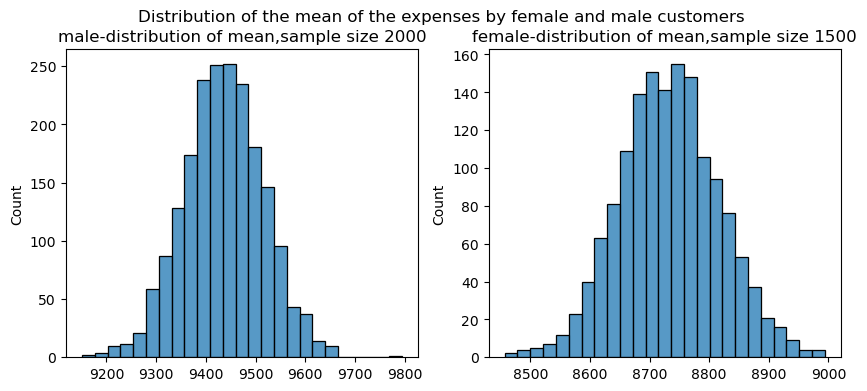

In [58]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
fig.suptitle("Distribution of the mean of the expenses by female and male customers")

plt.subplot(1,2,1)
sns.histplot(data=male_means,bins=25)
plt.title("male-distribution of mean,sample size 2000")

plt.subplot(1,2,2)
sns.histplot(data=female_means,bins=25)
plt.title("female-distribution of mean,sample size 1500")

**insights:**
According to the central limit theorem sample means tend to follow a normal distribution, even if the original population isn't normal.So Distribution of the mean of the expenses by female and male customers is normal distribution

##### 4.Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [59]:
print("confidence intervals of average male:",calc_CI(male_sample_mean,male_sample_std , N, confidence))
print("confidence intervals of average female:",calc_CI(female_sample_mean,female_sample_std , N, confidence))

Standard Error:  2.077758922342176
confidence intervals of average male: ('x1:', 9431.150884343653, 'x2:', 9439.295549656348)
Standard Error:  2.1658664722380365
confidence intervals of average female: ('x1:', 8728.364838830203, 'x2:', 8736.85487939202)


The confidence intervals of the average spending for both males and females do not overlap. For males, the confidence interval ranges from approximately 9432.66 to 9440.62, while for females, it ranges from approximately 8730.07 to 8738.96.

Company can use this finding to better understand how men and women shop differently. They can then adjust their marketing and product offerings to make shopping more appealing to each group, potentially boosting sales and customer satisfaction.

##### 5.Confidence intervals and distribution of the mean of the expenses by married  and unmarried customers.

In [61]:
df_married=df[df["Marital_Status"]==1]
df_married.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254


In [62]:
df_unmarried=df[df["Marital_Status"]==0]
df_unmarried.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [63]:
#Confidence_interval  of the mean of the expenses by married customers.
married_sample_size=4000
number_of_repetation =2000

married_means=[]
for i in range(number_of_repetation):
  married_mean=df_married.sample(married_sample_size,replace=True)["Purchase"].mean()
  married_means.append(married_mean)

# finding confidence_interval:
married_sample_mean=np.mean(married_means)
married_sample_std=np.std(married_means)
N=number_of_repetation
confidence=0.95
print("mean of married_sample_mean :",np.mean(married_means))
print("confidence_interval_married:",calc_CI(married_sample_mean,married_sample_std , N, confidence))

mean of married_sample_mean : 9264.207418625001
Standard Error:  1.7604703667286759
confidence_interval_married: ('x1:', 9260.756960110362, 'x2:', 9267.65787713964)


In [64]:
#Confidence_interval  of the mean of the expenses by unmarried customers.
unmarried_sample_size=3000
number_of_repetation =1500

unmarried_means=[]
for i in range(number_of_repetation):
  unmarried_mean=df_unmarried.sample(unmarried_sample_size,replace=True)["Purchase"].mean()
  unmarried_means.append(unmarried_mean)

# finding confidence_interval:
unmarried_sample_mean=np.mean(unmarried_means)
unmarried_sample_std=np.std(unmarried_means)
N=number_of_repetation
confidence=0.95
print("mean of unmarried_sample_mean :",np.mean(married_means))
print("confidence_interval_unmarried:",calc_CI(unmarried_sample_mean,unmarried_sample_std , N, confidence))


mean of unmarried_sample_mean : 9264.207418625001
Standard Error:  2.3217631094010582
confidence_interval_unmarried: ('x1:', 9261.66217192494, 'x2:', 9270.763316075061)


##### **Distribution of the mean of the expenses by married and unmarried customers.**

Text(0.5, 1.0, 'unmarried-distribution of mean,sample size 3000')

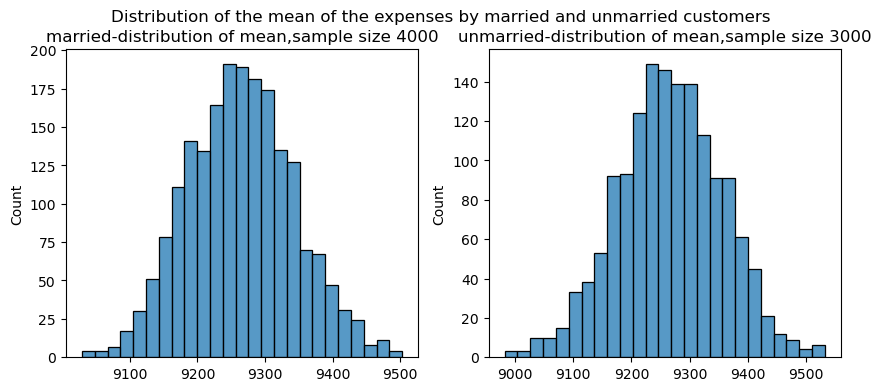

In [65]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
fig.suptitle("Distribution of the mean of the expenses by married and unmarried customers")

plt.subplot(1,2,1)
sns.histplot(data=married_means,bins=25)
plt.title("married-distribution of mean,sample size 4000")

plt.subplot(1,2,2)
sns.histplot(data=unmarried_means,bins=25)
plt.title("unmarried-distribution of mean,sample size 3000")

##### 4.Are confidence intervals of average married and unmarried spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [66]:
print("confidence intervals of average married:",calc_CI(married_sample_mean,married_sample_std , N, confidence))
print("confidence intervals of average unmarried:",calc_CI(unmarried_sample_mean,unmarried_sample_std , N, confidence))

Standard Error:  2.0328160802623203
confidence intervals of average married: ('x1:', 9260.223172320493, 'x2:', 9268.191664929509)
Standard Error:  2.3217631094010582
confidence intervals of average unmarried: ('x1:', 9261.66217192494, 'x2:', 9270.763316075061)


##### **Insights:**
The confidence intervals of average spending for married and unmarried customers overlap, indicating that there is no statistically significant difference in spending between these two groups.

To leverage this conclusion, The retail company can focus on providing a consistent shopping experience for both married and unmarried customers. They can continue to offer a diverse range of products and promotions that appeal to a broad customer base, ensuring that both groups feel valued and catered to.


##### 6.Confidence intervals and distribution of the mean of the expenses by different Age group customers.

In [67]:
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [68]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [69]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [70]:
# Calculate means and standard deviations by age group
mean_purchase_by_age = df.groupby('Age')['Purchase'].mean()
std_purchase_by_age = df.groupby('Age')['Purchase'].std()

# Calculate confidence intervals for each age group
age_groups = df['Age'].unique()

confidence_intervals = {}
for age_group in age_groups:
    n_age_group = df['Age'].value_counts()[age_group]
    margin_error_age_group = 1.96 * (std_purchase_by_age[age_group] / (n_age_group ** 0.5))
    ci_age_group = (mean_purchase_by_age[age_group] - margin_error_age_group, mean_purchase_by_age[age_group] + margin_error_age_group)
    confidence_intervals[age_group] = ci_age_group

print("Mean Purchase by Age Group:")
print(mean_purchase_by_age)
print("Confidence Intervals by Age Group:")
print(confidence_intervals)

Mean Purchase by Age Group:
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64
Confidence Intervals by Age Group:
{'0-17': (8851.946472627222, 9014.982808262726), '55+': (9269.297603592035, 9403.263315306775), '26-35': (9231.733291303959, 9273.647974435817), '46-50': (9163.084305814991, 9254.167089121664), '51-55': (9483.990538993237, 9585.625522927234), '36-45': (9301.668865554733, 9361.032524281014), '18-25': (9138.407374412845, 9200.919838109732)}


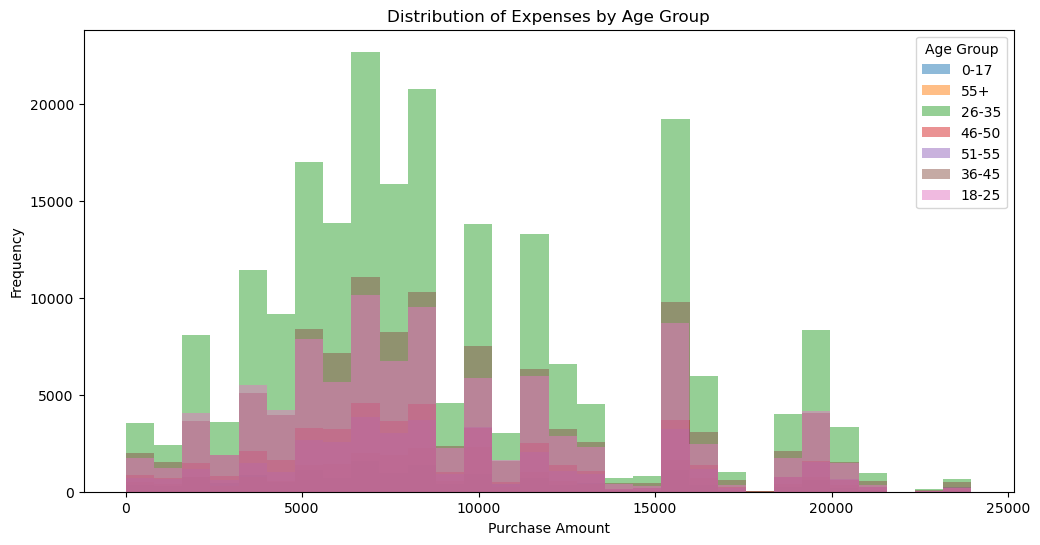

In [71]:
# Create histograms by age group
plt.figure(figsize=(12, 6))
for age_group in age_groups:
    df[df['Age'] == age_group]['Purchase'].plot.hist(alpha=0.5, bins=30, label=age_group)

plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Expenses by Age Group')
plt.legend(title='Age Group')
plt.show()

**Insights:**

1. **Spending Differences by Gender**: In our dataset, there are more male customers than female customers. On average, men tend to spend more per shopping trip than women. This is partly because there are more men in the dataset, but other factors may also contribute.



**Recommendations:**

1. **Targeted Marketing**: Company can create advertisements and promotions that specifically appeal to men and women. By understanding what each group likes, it can make its advertising more effective.

2. **Product Choices**: Company can look at which types of products are popular with men and women and make sure those products are easy to find and buy in the store.

3. **Different Groups**: Company can also look at other factors, like how old customers are, where they live, and if they're married or not. This can help to figure out how to make shopping better for different types of customers.

4. **Consistent Shopping**: While Company is making shopping better for different groups, it's important to make sure that everyone has a good shopping experience, no matter who they are.

5. **Keep Learning**: Company should always pay attention to what customers are doing and keep trying to make things better. This way, they can keep up with what customers like and make shopping  even better.

6. **Good Prices**: Company can use what they know about how customers spend money to make sure their prices are good and that they're giving good deals.

7. **Listen to Customers**: It can ask customers how they're doing and what they think. This can help the company understand what they're doing right and what they need to work on.